In [1]:
#stl
import os
import warnings

#data handling
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import missingno as mso

#stats
import scipy
import sklearn

#network
import networkx as nx

#vis
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as osp
import time
sns.set(font_scale = 1)
sns.set_style("whitegrid")

#os
import importlib.metadata
import json
import logging
import os
import re
import tempfile
import time
import ast
from pathlib import Path
from typing import Any, Callable, Dict, List, Literal, Optional, Tuple, Type, TypeVar, Union


ModuleNotFoundError: No module named 'missingno'

In [2]:
!ls data/csv_files/

DATA_LOOK.ipynb		   kidney_recipient.txt  kr_enc_reops.csv
kidney_deceased_donor.csv  kr_enc_labs.csv
kidney_living_donor.csv    kr_enc_readms.csv


In [ ]:
deceased = pd.read_csv("data/csv_files/kidney_deceased_donor.csv", index_col=[0])

In [4]:
deceased

,CASEID,STATUS,GENDER,ETHNICITY_RACE,AGE_TSRF,DIABETES_DON,DIABETES_DON_INS,HGT_TSRF,HGT_UNIT,WGT_TSRF,...,DTOP_HCT,DTOP_HEMOGLOBIN,DTOP_HIV,DTOP_INR,DTOP_PLATELET_CNT,DTOP_SODIUM,MTOP_DCD_DEATH,MTOP_DCD_DONOR8080,MTOP_DCD_ORGFLUSH,MTOP_DCD_WD_RESPSUP
0,100866.0,C,Female,White,23,No,NaN,163.0,1.0,80.0,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
1,101068.0,C,Female,Unknown/Not Reported,47,No,NaN,170.0,1.0,67.0,...,1.0,1.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,101084.0,C,Male,Unknown/Not Reported,24,No,NaN,177.0,1.0,95.0,...,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,101103.0,C,Female,White,44,No,NaN,160.0,1.0,85.0,...,0.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,101586.0,C,Male,White,34,No,NaN,163.0,1.0,102.0,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,996363.0,C,Male,White,29,No,NaN,175.0,1.0,92.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2541,998392.0,C,Female,White,46,No,NaN,160.0,1.0,72.0,...,1.0,1.0,3.0,1.0,1.0,1.0,7.0,53.0,0.0,56.0
2542,998660.0,C,Female,White,22,No,NaN,160.0,1.0,72.0,...,0.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2543,999131.0,C,Male,Black or African American,55,No,NaN,180.0,1.0,93.0,...,1.0,1.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
living = pd.read_csv("data/csv_files/kidney_living_donor.csv",  index_col=[0])

In [ ]:
hi = list(set(living.columns.tolist()) & set(deceased.columns.tolist()))
len(hi)

37

In [ ]:
len(living.columns.tolist())

138

In [8]:
hi

['BILIRUBIN',
 'DTOP_BUN',
 'WGT_TSRF',
 'DTOP_PLATELET_CNT',
 'ALKPHOS',
 'WGT_UNIT',
 'DTOP_A1C',
 'DTOP_HCT',
 'ETHNICITY_RACE',
 'CASEID',
 'DTOP_INR',
 'HGT_TSRF',
 'DTOP_BILIRUBIN',
 'HEMOGLOBIN',
 'ALBUMIN',
 'A1C',
 'BLOOD_TYPE',
 'AGE_TSRF',
 'DTOP_HOSPADMIT',
 'DTOP_ALT_SGPT',
 'CREATININE',
 'DTOP_ALKPHOS',
 'DTOP_CREATININE',
 'BUN',
 'DTOP_SODIUM',
 'DTOP_ALBUMIN',
 'GENDER',
 'HCT',
 'ALT_SGPT',
 'AST_SGOT',
 'BMI_TSRF',
 'SODIUM',
 'DTOP_HEMOGLOBIN',
 'DTOP_AST_SGOT',
 'HGT_UNIT',
 'PLATELET_CNT',
 'INR']

In [9]:
living = living[hi]
deceased = deceased[hi]


In [10]:
final_donor = pd.concat([living, deceased], ignore_index=True)
final_donor


,BILIRUBIN,DTOP_BUN,WGT_TSRF,DTOP_PLATELET_CNT,ALKPHOS,WGT_UNIT,DTOP_A1C,DTOP_HCT,ETHNICITY_RACE,CASEID,...,HCT,ALT_SGPT,AST_SGOT,BMI_TSRF,SODIUM,DTOP_HEMOGLOBIN,DTOP_AST_SGOT,HGT_UNIT,PLATELET_CNT,INR
0,1.0,8.0,219.0,8.0,49.0,2.0,322.0,8.0,White,100501.0,...,47.5,38.0,22.0,30.0,141.0,8.0,8.0,1.0,210.0,1.02
1,0.5,147.0,86.0,6.0,92.0,1.0,147.0,6.0,White,101200.0,...,41.1,19.0,23.0,33.0,141.0,6.0,147.0,1.0,322.0,0.90
2,0.1,14.0,68.0,14.0,55.0,1.0,NaN,14.0,White,101521.0,...,45.0,14.0,18.0,29.0,138.0,14.0,14.0,1.0,290.0,1.00
3,1.0,4.0,191.0,4.0,72.0,2.0,NaN,4.0,White,102204.0,...,41.3,10.0,17.0,23.0,137.0,4.0,4.0,2.0,221.0,1.10
4,0.3,8.0,217.0,8.0,52.0,2.0,NaN,8.0,White,104237.0,...,47.4,17.0,20.0,32.0,147.0,8.0,8.0,2.0,180.0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,0.9,0.0,92.0,0.0,60.0,1.0,NaN,0.0,White,996363.0,...,46.6,102.0,123.0,30.0,141.0,0.0,0.0,1.0,284.0,1.40
3815,0.4,1.0,72.0,1.0,61.0,1.0,NaN,1.0,White,998392.0,...,24.0,77.0,77.0,28.0,148.0,1.0,1.0,1.0,166.0,30.00
3816,0.4,0.0,72.0,0.0,222.0,1.0,11.0,0.0,White,998660.0,...,28.8,135.0,80.0,28.0,132.0,0.0,0.0,1.0,268.0,1.50
3817,NaN,NaN,93.0,1.0,NaN,1.0,NaN,1.0,Black or African American,999131.0,...,36.0,NaN,NaN,29.0,151.0,1.0,NaN,1.0,89.0,NaN


In [11]:
len(set(final_donor["CASEID"]))

3819

In [12]:
final_donor = final_donor.dropna()
final_donor

,BILIRUBIN,DTOP_BUN,WGT_TSRF,DTOP_PLATELET_CNT,ALKPHOS,WGT_UNIT,DTOP_A1C,DTOP_HCT,ETHNICITY_RACE,CASEID,...,HCT,ALT_SGPT,AST_SGOT,BMI_TSRF,SODIUM,DTOP_HEMOGLOBIN,DTOP_AST_SGOT,HGT_UNIT,PLATELET_CNT,INR
0,1.00,8.0,219.0,8.0,49.0,2.0,322.0,8.0,White,100501.0,...,47.5,38.0,22.0,30.0,141.0,8.0,8.0,1.0,210.0,1.02
1,0.50,147.0,86.0,6.0,92.0,1.0,147.0,6.0,White,101200.0,...,41.1,19.0,23.0,33.0,141.0,6.0,147.0,1.0,322.0,0.90
6,0.50,118.0,80.0,118.0,59.0,1.0,118.0,118.0,White,104758.0,...,37.5,16.0,17.0,28.0,139.0,118.0,118.0,1.0,284.0,1.10
7,0.60,246.0,102.0,10.0,49.0,1.0,244.0,10.0,White,105125.0,...,47.7,22.0,20.0,26.0,137.0,10.0,246.0,1.0,238.0,1.10
8,0.70,15.0,73.0,15.0,56.0,1.0,62.0,15.0,Hispanic/Latino,107379.0,...,40.0,16.0,15.0,30.0,137.0,15.0,15.0,1.0,349.0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,0.30,0.0,90.0,1.0,107.0,1.0,9.0,0.0,Black or African American,995558.0,...,25.0,27.0,35.0,32.0,135.0,0.0,1.0,1.0,261.0,1.10
3811,1.40,1.0,151.0,1.0,92.0,2.0,1.0,1.0,Hispanic/Latino,995710.0,...,32.2,120.0,144.0,25.0,159.0,1.0,1.0,1.0,91.0,1.70
3813,0.82,1.0,61.0,1.0,92.0,1.0,3.0,1.0,Unknown/Not Reported,996330.0,...,36.0,377.0,160.0,20.0,155.0,1.0,1.0,1.0,63.0,1.30
3816,0.40,0.0,72.0,0.0,222.0,1.0,11.0,0.0,White,998660.0,...,28.8,135.0,80.0,28.0,132.0,0.0,0.0,1.0,268.0,1.50


In [13]:
final_donor.to_csv("data/final_csv/donor.csv")

In [14]:
recipient = pd.read_csv("data/csv_files/kidney_recipient.txt")
recipient


,CASEID,STATUS,GENDER,ETHNICITY_RACE,AGE_TSRF,EMPLOYMENT_STATUS,EMPLOYMENT_STATUS_EMP,EMPLOYMENT_STATUS_UNEMPREC,HIGHEST_ED_LEVEL,PRIMARY_INSURANCE,...,DFOP_STENT_REMOVAL,DFOP_UTI,DFOP_VEIN_THROMBOSIS,DFOP_VENTILATOR,DFOP_HOSPDISCH,DFOP_30DCREAT,DFOP_90DCREAT,DFOP_1YCREAT,DFOP_DEATH,DFOP_GRAFT_LOSS
0,100501,One Year Complete,Male,White,23,Employed,Full Time,NaN,Associate/Bachelor degree,Private,...,35,,,,12,31,92,,,
1,100866,One Year Complete,Male,White,58,Unemployed,NaN,Disability,High school (9-12) or GED,Government Sponsored,...,18,,,,4,31,85,358,,
2,101068,90-Day Complete,Female,Unknown/Not Reported,43,Unknown,NaN,NaN,Unknown,Other,...,60,,,,9,30,93,,,
3,101084,One Year Complete,Female,Unknown/Not Reported,23,Unknown,NaN,NaN,Unknown,Other,...,44,,,,4,30,86,346,,
4,101103,90-Day Complete,Male,White,66,Unemployed,NaN,Patient Choice/Retired,High school (9-12) or GED,Government Sponsored,...,23,,,,3,29,93,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,999131,90-Day Complete,Male,Hispanic/Latino,55,Employed,Full Time,NaN,Associate/Bachelor degree,Private,...,40,,,,5,16,92,,,
3767,999490,One Year Complete,Male,White,38,Unemployed,NaN,Disability,High school (9-12) or GED,Government Sponsored,...,2,,,,6,19,52,344,,
3768,999534,90-Day Complete,Male,White,67,Unemployed,NaN,Patient Choice/Retired,Attended college/Technical school,Government Sponsored,...,19,,,,3,32,88,,,
3769,999617,90-Day Complete,Male,Black or African American,30,Unemployed,NaN,Disability,Post-College graduate degree,Government Sponsored,...,35,,,,9,31,91,,,


In [15]:
final_donor.columns

Index(['BILIRUBIN', 'DTOP_BUN', 'WGT_TSRF', 'DTOP_PLATELET_CNT', 'ALKPHOS',
       'WGT_UNIT', 'DTOP_A1C', 'DTOP_HCT', 'ETHNICITY_RACE', 'CASEID',
       'DTOP_INR', 'HGT_TSRF', 'DTOP_BILIRUBIN', 'HEMOGLOBIN', 'ALBUMIN',
       'A1C', 'BLOOD_TYPE', 'AGE_TSRF', 'DTOP_HOSPADMIT', 'DTOP_ALT_SGPT',
       'CREATININE', 'DTOP_ALKPHOS', 'DTOP_CREATININE', 'BUN', 'DTOP_SODIUM',
       'DTOP_ALBUMIN', 'GENDER', 'HCT', 'ALT_SGPT', 'AST_SGOT', 'BMI_TSRF',
       'SODIUM', 'DTOP_HEMOGLOBIN', 'DTOP_AST_SGOT', 'HGT_UNIT',
       'PLATELET_CNT', 'INR'],
      dtype='object')

In [16]:
recipient.columns

Index(['CASEID', 'STATUS', 'GENDER', 'ETHNICITY_RACE', 'AGE_TSRF',
       'EMPLOYMENT_STATUS', 'EMPLOYMENT_STATUS_EMP',
       'EMPLOYMENT_STATUS_UNEMPREC', 'HIGHEST_ED_LEVEL', 'PRIMARY_INSURANCE',
       ...
       'DFOP_STENT_REMOVAL', 'DFOP_UTI', 'DFOP_VEIN_THROMBOSIS',
       'DFOP_VENTILATOR', 'DFOP_HOSPDISCH', 'DFOP_30DCREAT', 'DFOP_90DCREAT',
       'DFOP_1YCREAT', 'DFOP_DEATH', 'DFOP_GRAFT_LOSS'],
      dtype='object', length=199)

In [17]:
len(list(set(recipient.columns) & set(final_donor.columns)))

37

In [18]:
recipient = recipient.fillna(value = float(0.0))
recipient

,CASEID,STATUS,GENDER,ETHNICITY_RACE,AGE_TSRF,EMPLOYMENT_STATUS,EMPLOYMENT_STATUS_EMP,EMPLOYMENT_STATUS_UNEMPREC,HIGHEST_ED_LEVEL,PRIMARY_INSURANCE,...,DFOP_STENT_REMOVAL,DFOP_UTI,DFOP_VEIN_THROMBOSIS,DFOP_VENTILATOR,DFOP_HOSPDISCH,DFOP_30DCREAT,DFOP_90DCREAT,DFOP_1YCREAT,DFOP_DEATH,DFOP_GRAFT_LOSS
0,100501,One Year Complete,Male,White,23,Employed,Full Time,0.0,Associate/Bachelor degree,Private,...,35,,,,12,31,92,,,
1,100866,One Year Complete,Male,White,58,Unemployed,0.0,Disability,High school (9-12) or GED,Government Sponsored,...,18,,,,4,31,85,358,,
2,101068,90-Day Complete,Female,Unknown/Not Reported,43,Unknown,0.0,0.0,Unknown,Other,...,60,,,,9,30,93,,,
3,101084,One Year Complete,Female,Unknown/Not Reported,23,Unknown,0.0,0.0,Unknown,Other,...,44,,,,4,30,86,346,,
4,101103,90-Day Complete,Male,White,66,Unemployed,0.0,Patient Choice/Retired,High school (9-12) or GED,Government Sponsored,...,23,,,,3,29,93,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,999131,90-Day Complete,Male,Hispanic/Latino,55,Employed,Full Time,0.0,Associate/Bachelor degree,Private,...,40,,,,5,16,92,,,
3767,999490,One Year Complete,Male,White,38,Unemployed,0.0,Disability,High school (9-12) or GED,Government Sponsored,...,2,,,,6,19,52,344,,
3768,999534,90-Day Complete,Male,White,67,Unemployed,0.0,Patient Choice/Retired,Attended college/Technical school,Government Sponsored,...,19,,,,3,32,88,,,
3769,999617,90-Day Complete,Male,Black or African American,30,Unemployed,0.0,Disability,Post-College graduate degree,Government Sponsored,...,35,,,,9,31,91,,,


In [19]:
recipient = recipient[final_donor.columns]

In [20]:
recipient

,BILIRUBIN,DTOP_BUN,WGT_TSRF,DTOP_PLATELET_CNT,ALKPHOS,WGT_UNIT,DTOP_A1C,DTOP_HCT,ETHNICITY_RACE,CASEID,...,HCT,ALT_SGPT,AST_SGOT,BMI_TSRF,SODIUM,DTOP_HEMOGLOBIN,DTOP_AST_SGOT,HGT_UNIT,PLATELET_CNT,INR
0,0.8,8,139,8,69,2,,8,White,100501,...,32,28,15,21,142,8,8,1,240,1.15
1,0.9,0,166,0,122,2,0,0,White,100866,...,34.9,9,11,26,140,0,0,2,161,1.1
2,0.23,1,77,1,111,1,,1,Unknown/Not Reported,101068,...,30,42,28,25,132,1,1,1,187,2.3
3,0.35,1,59,1,82,1,,1,Unknown/Not Reported,101084,...,35,15,10,23,137,1,1,2,124,1.1
4,0.5,1,95,1,151,1,1,1,White,101103,...,33.8,12,12,35,137,1,1,1,115,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,0.4,0,100,0,54,1,,0,Hispanic/Latino,999131,...,28.2,46,48,28,128,0,,1,165,
3767,0.6,0,62,0,87,1,46,0,White,999490,...,28.3,7,6,21,141,0,0,1,156,1.1
3768,0.7,16,74,16,66,1,252,16,White,999534,...,22,38,24,22,137,16,16,1,89,1
3769,0.9,0,75,0,114,1,,0,Black or African American,999617,...,32.9,12,19,24,141,0,0,1,194,1.1


In [21]:
recipient.to_csv("data/final_csv/final_recipient.csv")

In [22]:
len(recipient)

3771

In [23]:
from graph_create.kidney_recipient_network import donor_recipient_network_creation
dr_edge_index, dr_edge_weight, dr_edge_type, subject, object = donor_recipient_network_creation(subject=final_donor, object = recipient)

------Constructing Donor-Recipient Network------


Donor-Recipient Matching: 100%|██████████| 1839/1839 [00:13<00:00, 138.03it/s]

Donor-Recipient Network Statistics:
	nodes: 3678
	edges: 1839


In [24]:
final_df = pd.concat([subject, object], ignore_index=True)
final_df["NODE_ID"]

0          0
1          1
2          2
3          3
4          4
        ... 
5810    5809
5811    5810
5812    5811
5813    5812
5814    5813
Name: NODE_ID, Length: 5815, dtype: int64

In [25]:
final_df = final_df.replace(r'^\s*$', np.nan, regex=True)
final_df = final_df.fillna(value=float(0.0))

<Axes: >

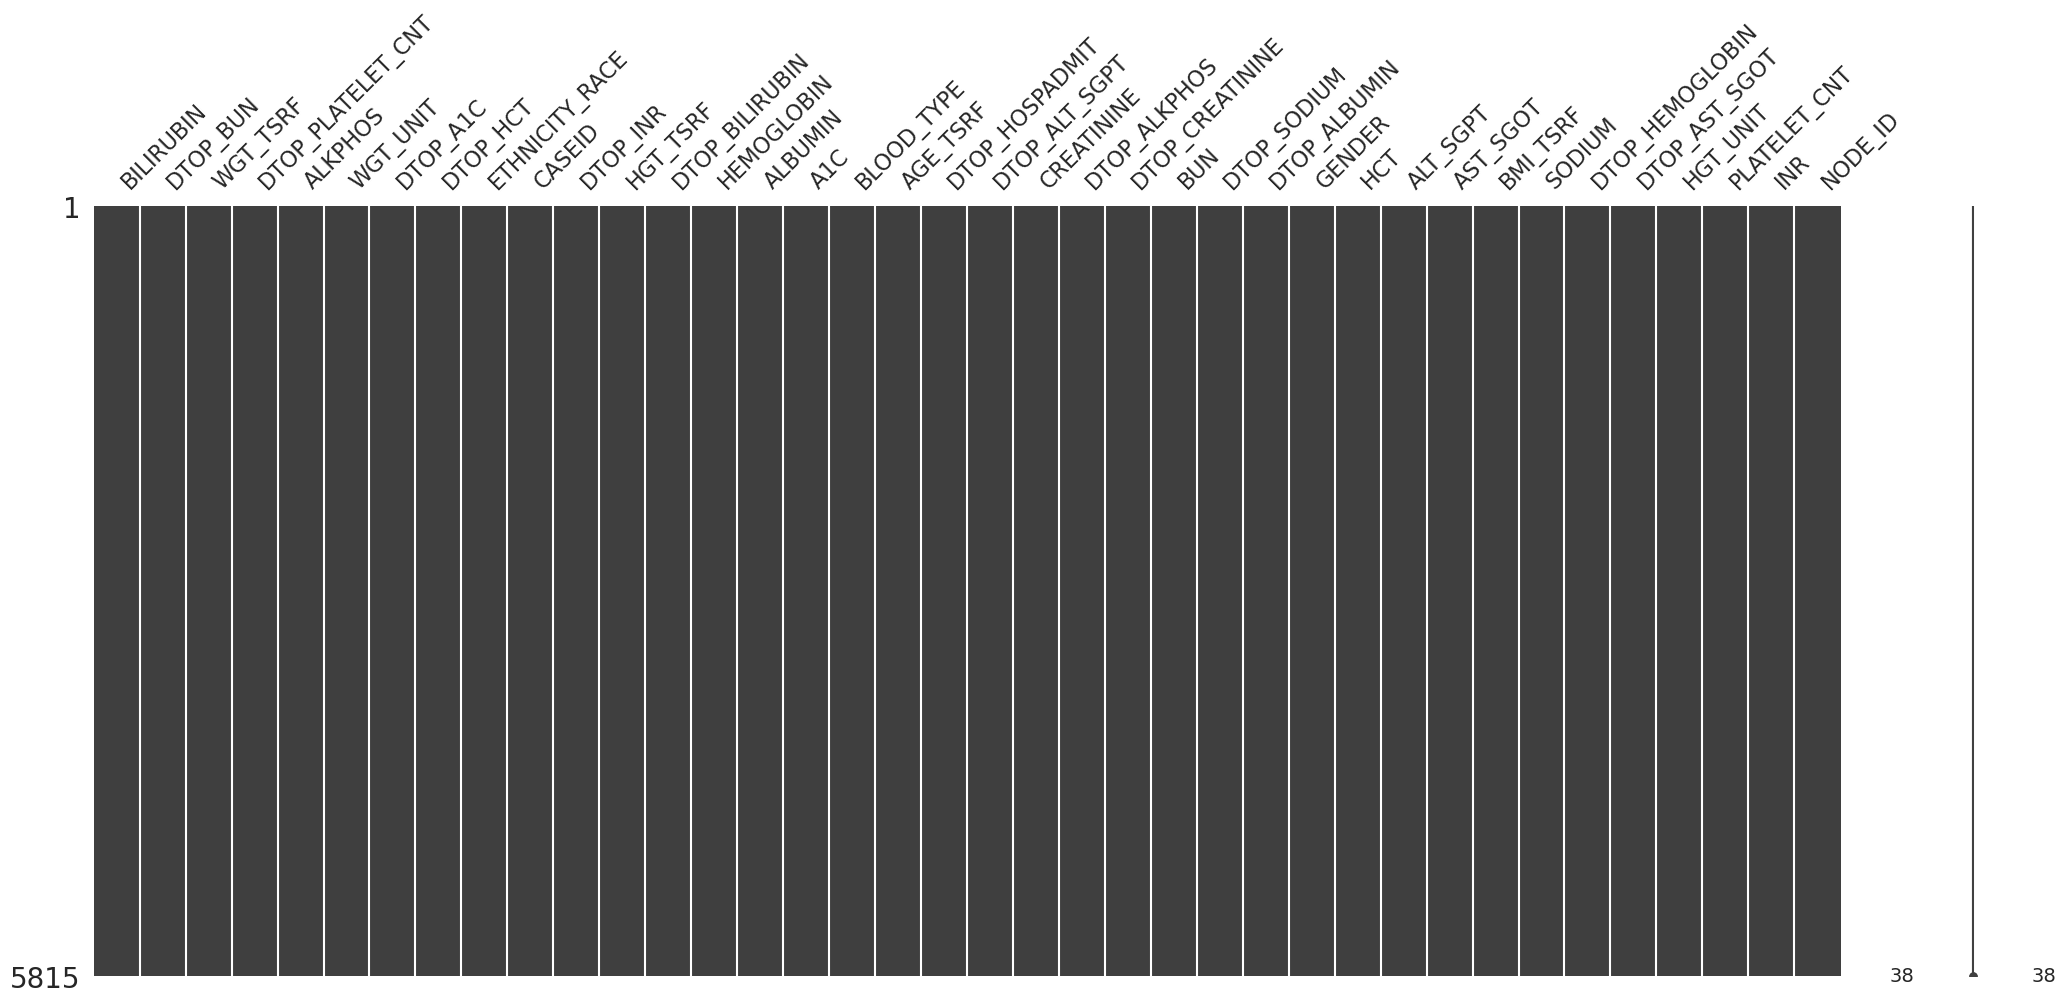

In [26]:
import missingno as mso
mso.matrix(final_df)

In [27]:
final_df = final_df.astype(float, errors="ignore")

In [28]:
final_df["A1C"].iloc[-1]

0.0

In [29]:
final_df.dtypes

BILIRUBIN            float64
DTOP_BUN             float64
WGT_TSRF             float64
DTOP_PLATELET_CNT    float64
ALKPHOS              float64
WGT_UNIT             float64
DTOP_A1C             float64
DTOP_HCT             float64
ETHNICITY_RACE        object
CASEID               float64
DTOP_INR             float64
HGT_TSRF             float64
DTOP_BILIRUBIN       float64
HEMOGLOBIN           float64
ALBUMIN              float64
A1C                  float64
BLOOD_TYPE            object
AGE_TSRF              object
DTOP_HOSPADMIT       float64
DTOP_ALT_SGPT        float64
CREATININE           float64
DTOP_ALKPHOS         float64
DTOP_CREATININE      float64
BUN                  float64
DTOP_SODIUM          float64
DTOP_ALBUMIN         float64
GENDER                object
HCT                  float64
ALT_SGPT             float64
AST_SGOT             float64
BMI_TSRF             float64
SODIUM               float64
DTOP_HEMOGLOBIN      float64
DTOP_AST_SGOT        float64
HGT_UNIT      

In [30]:
final_df = final_df.select_dtypes(include = ['float'])
final_df

,BILIRUBIN,DTOP_BUN,WGT_TSRF,DTOP_PLATELET_CNT,ALKPHOS,WGT_UNIT,DTOP_A1C,DTOP_HCT,CASEID,DTOP_INR,...,ALT_SGPT,AST_SGOT,BMI_TSRF,SODIUM,DTOP_HEMOGLOBIN,DTOP_AST_SGOT,HGT_UNIT,PLATELET_CNT,INR,NODE_ID
0,1.0,8.0,219.0,8.0,49.0,2.0,322.0,8.0,100501.0,8.0,...,38.0,22.0,30.0,141.0,8.0,8.0,1.0,210.0,1.02,0.0
1,0.5,147.0,86.0,6.0,92.0,1.0,147.0,6.0,101200.0,461.0,...,19.0,23.0,33.0,141.0,6.0,147.0,1.0,322.0,0.90,1.0
2,0.5,118.0,80.0,118.0,59.0,1.0,118.0,118.0,104758.0,118.0,...,16.0,17.0,28.0,139.0,118.0,118.0,1.0,284.0,1.10,2.0
3,0.6,246.0,102.0,10.0,49.0,1.0,244.0,10.0,105125.0,246.0,...,22.0,20.0,26.0,137.0,10.0,246.0,1.0,238.0,1.10,3.0
4,0.7,15.0,73.0,15.0,56.0,1.0,62.0,15.0,107379.0,15.0,...,16.0,15.0,30.0,137.0,15.0,15.0,1.0,349.0,1.10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,0.4,0.0,100.0,0.0,54.0,1.0,0.0,0.0,999131.0,0.0,...,46.0,48.0,28.0,128.0,0.0,0.0,1.0,165.0,0.00,5809.0
5811,0.6,0.0,62.0,0.0,87.0,1.0,46.0,0.0,999490.0,0.0,...,7.0,6.0,21.0,141.0,0.0,0.0,1.0,156.0,1.10,5810.0
5812,0.7,16.0,74.0,16.0,66.0,1.0,252.0,16.0,999534.0,16.0,...,38.0,24.0,22.0,137.0,16.0,16.0,1.0,89.0,1.00,5811.0
5813,0.9,0.0,75.0,0.0,114.0,1.0,0.0,0.0,999617.0,0.0,...,12.0,19.0,24.0,141.0,0.0,0.0,1.0,194.0,1.10,5812.0


In [31]:
final_df = final_df.drop(columns = ["CASEID", "NODE_ID"])

In [32]:
final_df

,BILIRUBIN,DTOP_BUN,WGT_TSRF,DTOP_PLATELET_CNT,ALKPHOS,WGT_UNIT,DTOP_A1C,DTOP_HCT,DTOP_INR,HGT_TSRF,...,HCT,ALT_SGPT,AST_SGOT,BMI_TSRF,SODIUM,DTOP_HEMOGLOBIN,DTOP_AST_SGOT,HGT_UNIT,PLATELET_CNT,INR
0,1.0,8.0,219.0,8.0,49.0,2.0,322.0,8.0,8.0,183.0,...,47.5,38.0,22.0,30.0,141.0,8.0,8.0,1.0,210.0,1.02
1,0.5,147.0,86.0,6.0,92.0,1.0,147.0,6.0,461.0,163.0,...,41.1,19.0,23.0,33.0,141.0,6.0,147.0,1.0,322.0,0.90
2,0.5,118.0,80.0,118.0,59.0,1.0,118.0,118.0,118.0,170.0,...,37.5,16.0,17.0,28.0,139.0,118.0,118.0,1.0,284.0,1.10
3,0.6,246.0,102.0,10.0,49.0,1.0,244.0,10.0,246.0,198.0,...,47.7,22.0,20.0,26.0,137.0,10.0,246.0,1.0,238.0,1.10
4,0.7,15.0,73.0,15.0,56.0,1.0,62.0,15.0,15.0,155.0,...,40.0,16.0,15.0,30.0,137.0,15.0,15.0,1.0,349.0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,0.4,0.0,100.0,0.0,54.0,1.0,0.0,0.0,0.0,188.0,...,28.2,46.0,48.0,28.0,128.0,0.0,0.0,1.0,165.0,0.00
5811,0.6,0.0,62.0,0.0,87.0,1.0,46.0,0.0,0.0,173.0,...,28.3,7.0,6.0,21.0,141.0,0.0,0.0,1.0,156.0,1.10
5812,0.7,16.0,74.0,16.0,66.0,1.0,252.0,16.0,16.0,182.0,...,22.0,38.0,24.0,22.0,137.0,16.0,16.0,1.0,89.0,1.00
5813,0.9,0.0,75.0,0.0,114.0,1.0,0.0,0.0,0.0,178.0,...,32.9,12.0,19.0,24.0,141.0,0.0,0.0,1.0,194.0,1.10


In [33]:
final_np = final_df.to_numpy()
#from graph_create.similarity_network import similarity_network_creation

In [34]:
from graph_create.similarity_network import similarity_network_creation
s_edge_index, s_edge_weight, s_edge_type = similarity_network_creation(final_np, threshold=0.0001)

------Constructing Similarity Network------
	similarity operator...success
	edge_index/edge_weight creation...success
	chopping edges...success
Similarity Network Statistics:
	nodes: 5815
	edges: 3375
	(min edge, max edge): (0.9990664, 1.0)
	(avg, std): (0.9993738, 8.881972e-08)


In [35]:
import torch
s_edge_index, s_edge_weight, s_edge_type = s_edge_index.to(torch.long), s_edge_weight.to(torch.long), s_edge_type.to(torch.long)

In [36]:
dr_edge_index, dr_edge_weight, dr_edge_type = dr_edge_index.to(torch.long), dr_edge_weight.to(torch.long), dr_edge_type.to(torch.long)

In [42]:
import torch_geometric as pyg


#concat
edge_index = torch.cat([dr_edge_index, s_edge_index], dim=1)
edge_weight = torch.cat([dr_edge_weight, s_edge_weight], dim=0)
edge_type = torch.cat([dr_edge_type, s_edge_type], dim=0)

#create dataset
dataset = pyg.data.Data(x = final_np, edge_index = edge_index, edge_weight = edge_weight, edge_type = edge_type)


In [43]:
dataset

Data(x=[5815, 32], edge_index=[2, 5214], edge_weight=[5419], edge_type=[5419])

In [1]:
from torch_geometric.datasets import OGB_MAG

dataset = OGB_MAG(root='./data', preprocess='metapath2vec')
data = dataset[0]

Extracting data/mag/raw/mag.zip
Extracting data/mag/raw/mag_metapath2vec_emb.zip
Processing...
Done!


In [8]:
data

HeteroData(
  paper={
    x=[736389, 128],
    year=[736389],
    y=[736389],
    train_mask=[736389],
    val_mask=[736389],
    test_mask=[736389],
  },
  author={ x=[1134649, 128] },
  institution={ x=[8740, 128] },
  field_of_study={ x=[59965, 128] },
  (author, affiliated_with, institution)={ edge_index=[2, 1043998] },
  (author, writes, paper)={ edge_index=[2, 7145660] },
  (paper, cites, paper)={ edge_index=[2, 5416271] },
  (paper, has_topic, field_of_study)={ edge_index=[2, 7505078] }
)

In [7]:
data["author", "affiliated_with", "institution"]

{'edge_index': tensor([[      0,       1,       2,  ..., 1134645, 1134647, 1134648],
        [    845,     996,    3197,  ...,    5189,    4668,    4668]])}

Look at https://github.com/pyg-team/pytorch_geometric/blob/master/examples/rgcn.py for example on encoder
Look at https://graph4ai.github.io/graph4nlp/guide/classification/kgcompletion.html for GNN Encoder + Scoring Function